# Cohort Creation for Hinrichs Base Model

Patients with:
- SpO2
- Systolic BP
- Diastolic BP
- Mean BP
- Central Venous Pressure
- HR

observation window at least: 1 hour (up to 25 hours)
prediction horizon : 0
Prediction window: 5 min to 120 min - forecasting windows were dynamically adjusted, so at least 120 minutes
=> at least 65 min of recording

In [1]:
import mimic_waveform_explore_helper as mweh
import json

### Get subject_ids that have at least 90 min of the required data recordings

Let's assume they used non-invasive blood pressure (since SpO2 is also meausred non-invasively)

- SpO2: SpO2, %SpO2
- Systolic BP: NBP Sys, NBPSys, NBP SYS | ART Sys, ABP SYS, ABP Sys, ART SYS
- Diastolic BP: NBP Dia, NBPDias,  NBP DIA | ART Dia, ABP DIA, ABP Dia, ART DIA
- Mean BP: NBP Mean, NBPMean, NBP MEAN | ABP MEAN, ART Mean, ABP Mean, ART MEAN
- Central Venous Pressure: CVP
- HR: HR


Invasively and non-invasively measured blood pressure have the same value range, but differing accuracies. For now I wouldn't merge all of them. TODO discuss with Katia and Karen.

Since I have no idea how many records have CVP recordings let's have a look at them.

In [2]:
all_subjects = mweh.get_all_subjects_mimic_iii_waveform()
print(f"Total number of subjects with waveform records: {len(all_subjects)}")

Total number of subjects with waveform records: 10282


In [47]:
# get records with CVP and HR of at least 90 minutes
signals = ['CVP', 'HR']
min_duration = 90 * 60  # 90 minutes in seconds
long_cvp_hr_records = mweh.filter_waveform_numerics_by_signals_duration(
    all_subjects, signals=signals, min_duration_seconds=min_duration
)

In [48]:
print(f"Total number of records with CVP and HR of at least {min_duration // 60} minutes: {len(long_cvp_hr_records)}")

Total number of records with CVP and HR of at least 90 minutes: 6149


As a base we have 6.195 records with at least 90 minutes of recording containign CVP and HR measurements in the numeric of the mimic iii matched waveform.

In [49]:
# combinations
base_option = ['CVP', 'HR']
spo2_options = [['SpO2'], ['%SpO2']]
#- Systolic BP:  NBP Sys, NBPSys, NBP SYS | ART Sys, ABP SYS, ABP Sys, ART SYS
#- Diastolic BP: NBP Dia, NBPDias,  NBP DIA | ART Dia, ABP DIA, ABP Dia, ART DIA
#- Mean BP:     NBP Mean, NBPMean, NBP MEAN | ABP MEAN, ART Mean, ABP Mean, ART MEAN
# only non-invasive for now
bp_options = [
    ['NBP Sys', 'NBP Dia', 'NBP Mean'],
    ['NBPSys', 'NBPDias', 'NBPMean'],
    ['NBP SYS', 'NBP DIA', 'NBP MEAN'],
    ['ART Sys', 'ART Dia', 'ART Mean'],
    ['ABP SYS', 'ABP DIA', 'ABP MEAN'],
    ['ABP Sys', 'ABP Dia', 'ABP Mean'],
    ['ART SYS', 'ART DIA', 'ART MEAN']
]

signals_combinations = []
for bp in bp_options:
    for spo2 in spo2_options:
        signals_combinations.append(base_option + bp + spo2)

In [50]:
print(signals_combinations)

[['CVP', 'HR', 'NBP Sys', 'NBP Dia', 'NBP Mean', 'SpO2'], ['CVP', 'HR', 'NBP Sys', 'NBP Dia', 'NBP Mean', '%SpO2'], ['CVP', 'HR', 'NBPSys', 'NBPDias', 'NBPMean', 'SpO2'], ['CVP', 'HR', 'NBPSys', 'NBPDias', 'NBPMean', '%SpO2'], ['CVP', 'HR', 'NBP SYS', 'NBP DIA', 'NBP MEAN', 'SpO2'], ['CVP', 'HR', 'NBP SYS', 'NBP DIA', 'NBP MEAN', '%SpO2'], ['CVP', 'HR', 'ART Sys', 'ART Dia', 'ART Mean', 'SpO2'], ['CVP', 'HR', 'ART Sys', 'ART Dia', 'ART Mean', '%SpO2'], ['CVP', 'HR', 'ABP SYS', 'ABP DIA', 'ABP MEAN', 'SpO2'], ['CVP', 'HR', 'ABP SYS', 'ABP DIA', 'ABP MEAN', '%SpO2'], ['CVP', 'HR', 'ABP Sys', 'ABP Dia', 'ABP Mean', 'SpO2'], ['CVP', 'HR', 'ABP Sys', 'ABP Dia', 'ABP Mean', '%SpO2'], ['CVP', 'HR', 'ART SYS', 'ART DIA', 'ART MEAN', 'SpO2'], ['CVP', 'HR', 'ART SYS', 'ART DIA', 'ART MEAN', '%SpO2']]


In [51]:
for signals in signals_combinations:
    long_records = mweh.filter_waveform_numerics_by_signals_duration(
        all_subjects, signals=signals, min_duration_seconds=min_duration
    )
    print(f"Total number of records with {', '.join(signals)} of at least {min_duration // 60} minutes: {len(long_records)}")

Total number of records with CVP, HR, NBP Sys, NBP Dia, NBP Mean, SpO2 of at least 90 minutes: 0
Total number of records with CVP, HR, NBP Sys, NBP Dia, NBP Mean, %SpO2 of at least 90 minutes: 0
Total number of records with CVP, HR, NBPSys, NBPDias, NBPMean, SpO2 of at least 90 minutes: 1486
Total number of records with CVP, HR, NBPSys, NBPDias, NBPMean, %SpO2 of at least 90 minutes: 0
Total number of records with CVP, HR, NBP SYS, NBP DIA, NBP MEAN, SpO2 of at least 90 minutes: 0
Total number of records with CVP, HR, NBP SYS, NBP DIA, NBP MEAN, %SpO2 of at least 90 minutes: 0
Total number of records with CVP, HR, ART Sys, ART Dia, ART Mean, SpO2 of at least 90 minutes: 0
Total number of records with CVP, HR, ART Sys, ART Dia, ART Mean, %SpO2 of at least 90 minutes: 0
Total number of records with CVP, HR, ABP SYS, ABP DIA, ABP MEAN, SpO2 of at least 90 minutes: 0
Total number of records with CVP, HR, ABP SYS, ABP DIA, ABP MEAN, %SpO2 of at least 90 minutes: 0
Total number of records wi

Since the only combination that yielded any suitable records was CVP, HR, NBPSys, NBPDias, NBPMean, SpO2 with 1508 records, these are the records and signals that we will be working with for checking/testing Hinrichs algorithms.

Let's take a closer look.

In [21]:
min_duration = 90 * 60  # 65 minutes in seconds

In [22]:
valid_records = mweh.filter_waveform_numerics_by_signals_duration(
    all_subjects, signals=['CVP', 'HR', 'NBPSys', 'NBPDias', 'NBPMean', 'SpO2'], min_duration_seconds=min_duration)

In [23]:
# total list of unique subject
subjects = [s['subject'] for s in valid_records]
subjects = list(set(subjects))
print(f"Total number of unique subjects with valid records: {len(subjects)}")

Total number of unique subjects with valid records: 886


In [ ]:
# save valid records to a file
with open('data/hinrichs_dataset/valid_records_hinrichs_base_model.json', 'w') as f:
    json.dump(valid_records, f)

### Check how many of those subjects had cardiac surgery during their stay

according to Karens cohort specification

Goal: construction of source and target domain

In [62]:
# load valid records from file
with open('data/hinrichs_dataset/valid_records_hinrichs_base_model.json', 'r') as f:
    valid_records = json.load(f)

subjects = [s['subject'] for s in valid_records]
subjects = list(set(subjects))

In [3]:
conn, cur = mweh.connect_to_local_mimic_iii()

In [4]:
mweh.print_statistics_of_waveform_records(valid_records, cur)

Number of unique subjects: 886
Number of unique records: 1486
Number of unique stays: 892
Total duration of records: 373022699.9984995 seconds or 6217044.999974992 minutes or 103617.41666624986 hours or 4317.3923610937445 days


In [5]:
conn, cur = mweh.connect_to_local_mimic_iii()

In [6]:
mweh.test_connection_to_local_mimic_iii()

Connection to local MIMIC-III database successful.


In [7]:
relevant_subject_stay_ids_with_cardiac_surgery = mweh.get_subjects_with_cardiac_surgery(subjects, conn)

In [8]:
cmweh.print_statistics_of_waveform_records(translated_record_with_cardiac_surgery, cur)

1241 hadm_id start and end date entries found.
Number of unique subjects: 764
Number of unique records: 1220
Number of unique stays: 780
Total duration of records: 314634959.9986993 seconds or 5243915.999978322 minutes or 87398.5999996387 hours or 3641.608333318279 days


In [ ]:
# save the records with cardiac surgery to a file


In [10]:
# save valid translated records with cardiac surgery to a file
with open('data/hinrichs_dataset/translated_valid_records_with_cardiac_surgery_during_icu_stay_hinrichs_base_model.json', 'w') as f:
    json.dump(translated_record_with_cardiac_surgery, f)

In [11]:
# get all records that are not in the translated records with cardiac surgery in the form [{"subject": subject, "record_id": record_id}]
# remove all entries from valid_records that are in translated_record_with_cardiac_surgery
non_cariac_surgery_records = []
for record in valid_records:
    if not any(r['subject'] == record['subject'] and r['record_id'] == record['record_id'] for r in translated_record_with_cardiac_surgery):
        non_cariac_surgery_records.append(record)

mweh.print_statistics_of_waveform_records(non_cariac_surgery_records, cur)

Number of unique subjects: 171
Number of unique records: 266
Number of unique stays: 112
Total duration of records: 58387739.99980016 seconds or 973128.9999966694 minutes or 16218.816666611156 hours or 675.7840277754648 days


In [12]:
with open('data/hinrichs_dataset/records_without_cardiac_surgery_during_stay.txt', 'w') as f:
    for record in non_cariac_surgery_records:
        f.write(f"{record["record_id"]}\n")

### Create Datasets with Timestamps based on cptevents

gemäß https://www.aapc.com/codes/cpt-codes-range/33016-37799/ müssten die kardiochirurgischen Prozeduren inklusive die der herznahen Gefäße (also Aorta) tatsächlich vollständig durch die Codes "33016-33999 Surgical Procedures on the Heart and Pericardium" abgedeckt sein.

The CPTEVENTS table contains a list of which current procedural terminology codes were billed for which patients. This can be useful for determining if certain procedures have been performed (e.g. ventilation).

The ICD codes are generated for billing purposes at the end of the hospital stay.
ICD codes are recorded for all patient hospitalizations in MIMIC-III.



In [1]:
import mimic_waveform_explore_helper as mweh
import json

In [6]:
# load valid records from file
# save valid records to a file
valid_records = []
with open('data/hinrichs_dataset/valid_records_hinrichs_base_model.json', 'r') as f:
    valid_records = json.load(f)

print(len(valid_records))
print(valid_records[:5])

1486
[{'subject': 'p00/p000020/', 'record_id': 'p000020-2183-04-28-17-47n'}, {'subject': 'p00/p000033/', 'record_id': 'p000033-2116-12-24-12-35n'}, {'subject': 'p00/p000124/', 'record_id': 'p000124-2160-07-05-21-51n'}, {'subject': 'p00/p000124/', 'record_id': 'p000124-2160-07-06-15-23n'}, {'subject': 'p00/p000138/', 'record_id': 'p000138-2131-10-31-13-39n'}]


In [29]:
cpt_codes = []
for i in range(33016,37800):
    cpt_codes.append(str(i))


In [30]:
conn, cur = mweh.connect_to_local_mimic_iii()

In [31]:
records_with_cardiac_surgery = mweh.get_records_with_procedure_during_stay(valid_records, cpt_codes, cur)

In [32]:
mweh.print_statistics_of_waveform_records(records_with_cardiac_surgery, cur)

print(records_with_cardiac_surgery[:5])

Number of unique subjects: 116
Number of unique records: 242
Number of unique stays: 116
Total duration of records: 67451759.99967112 seconds or 1124195.9999945187 minutes or 18736.599999908645 hours or 780.6916666628601 days
[{'subject': 'p00/p000279/', 'record_id': 'p000279-2164-06-14-21-22n'}, {'subject': 'p00/p000608/', 'record_id': 'p000608-2167-03-09-11-54n'}, {'subject': 'p00/p000608/', 'record_id': 'p000608-2167-03-23-08-12n'}, {'subject': 'p00/p000710/', 'record_id': 'p000710-2182-02-18-17-20n'}, {'subject': 'p00/p000710/', 'record_id': 'p000710-2182-02-25-15-47n'}]


In [33]:
cardiac_surgery_based_on_icd9 = []
with open('data/hinrichs_dataset/translated_valid_records_with_cardiac_surgery_during_icu_stay_hinrichs_base_model.json', 'r') as f:
    cardiac_surgery_based_on_icd9 = json.load(f)

print(cardiac_surgery_based_on_icd9[:5])

mweh.print_statistics_of_waveform_records(cardiac_surgery_based_on_icd9, cur)

[{'subject': 'p02/p024431/', 'record_id': 'p024431-2197-08-30-01-33n'}, {'subject': 'p02/p024431/', 'record_id': 'p024431-2197-09-03-17-55n'}, {'subject': 'p02/p024431/', 'record_id': 'p024431-2197-09-04-16-54n'}, {'subject': 'p00/p000271/', 'record_id': 'p000271-2120-08-09-17-06n'}, {'subject': 'p00/p007688/', 'record_id': 'p007688-2146-07-14-17-21n'}]
Number of unique subjects: 764
Number of unique records: 1220
Number of unique stays: 780
Total duration of records: 314634959.9986993 seconds or 5243915.999978322 minutes or 87398.5999996387 hours or 3641.608333318279 days


In [46]:
# check how many icu_stays are associated with each hadm_id with a icd_9 code for cardiac surgery
def check_number_of_icu_stays(records, cur):
    icu_stay_counts = {}
    for record in records:
        record_id = record['record_id']
        subject_id = int(record_id.split('-')[0].replace('p', ''))
        hadm_id = mweh.get_hadm_id_from_record(record_id, cur)
        cur.execute("SELECT COUNT(*) FROM mimiciii.icustays WHERE hadm_id=%s", (hadm_id,))
        icu_stay_count = cur.fetchone()[0]
        icu_stay_counts[record_id] = icu_stay_count
    return icu_stay_counts

In [47]:
icd9_icu_stay_counts = check_number_of_icu_stays(cardiac_surgery_based_on_icd9, cur)
icd9_icu_stay_counts_df = pd.DataFrame(list(icd9_icu_stay_counts.items()), columns=['hadm_id', 'icu_stay_count'])
print(icd9_icu_stay_counts_df.head())

# count value counts for "icu_stay_counts"
icu_stay_counts_value_counts = icd9_icu_stay_counts_df['icu_stay_count'].value_counts()
print(icu_stay_counts_value_counts)

                     hadm_id  icu_stay_count
0  p024431-2197-08-30-01-33n               1
1  p024431-2197-09-03-17-55n               1
2  p024431-2197-09-04-16-54n               1
3  p000271-2120-08-09-17-06n               1
4  p007688-2146-07-14-17-21n               1
icu_stay_count
1    1067
2     134
3      15
4       3
7       1
Name: count, dtype: int64


In [34]:
# get cross section on cardiac_surgery_based_on_icd9 and records_with_cardiac_surgery
cross_section = [record for record in cardiac_surgery_based_on_icd9 if record in records_with_cardiac_surgery]

mweh.print_statistics_of_waveform_records(cross_section, cur)

Number of unique subjects: 100
Number of unique records: 217
Number of unique stays: 100
Total duration of records: 60126419.999694854 seconds or 1002106.9999949143 minutes or 16701.78333324857 hours or 695.9076388853571 days


In [51]:
# get aggregation
all_cardiac_surgery_records = cardiac_surgery_based_on_icd9 + records_with_cardiac_surgery

icd9_icu_stay_counts = check_number_of_icu_stays(all_cardiac_surgery_records, cur)
icd9_icu_stay_counts_df = pd.DataFrame(list(icd9_icu_stay_counts.items()), columns=['record_id', 'icu_stay_count'])
print(icd9_icu_stay_counts_df.head())

# count value counts for "icu_stay_counts"
icu_stay_counts_value_counts = icd9_icu_stay_counts_df['icu_stay_count'].value_counts()
print(icu_stay_counts_value_counts)

                   record_id  icu_stay_count
0  p024431-2197-08-30-01-33n               1
1  p024431-2197-09-03-17-55n               1
2  p024431-2197-09-04-16-54n               1
3  p000271-2120-08-09-17-06n               1
4  p007688-2146-07-14-17-21n               1
icu_stay_count
1    1092
2     134
3      15
4       3
7       1
Name: count, dtype: int64


In [ ]:
# TODO get statistics

In [52]:
# only keep values with icu_stay_count == 1
icd9_icu_stay_counts_df = icd9_icu_stay_counts_df[icd9_icu_stay_counts_df['icu_stay_count'] == 1]

with open('data/hinrichs_dataset/records_with_cardiac_surgery_cpt_and_icd9.txt', 'w') as f:
    for record_id in icd9_icu_stay_counts_df['record_id']:
        f.write(f"{record_id}\n")


In [53]:
mweh.transtlate_txt_to_csv_with_start_and_end('./data/hinrichs_dataset/records_with_cardiac_surgery_cpt_and_icd9.txt', 
                                             './data/hinrichs_dataset/records_with_start_endtime/records_with_cardiac_surgery_cpt_and_icd9.csv')

In [37]:
# get start and end for cross section
import pandas as pd
def get_start_end_for_procedure(records, cpt_codes):
    start_end_times = []
    for record in records:
        record_id = record['record_id']
        subject_id = int(record_id.split('-')[0].replace('p', ''))
        hadm_id = mweh.get_hadm_id_from_record(record_id, cur)

        cur.execute("SELECT cpt_cd, chartdate FROM mimiciii.cptevents WHERE subject_id=%s AND hadm_id=%s", (subject_id, hadm_id,))
        item_ids_mv = cur.fetchall()
        if item_ids_mv:
            if any(cpt_code in item_id[0] for cpt_code in cpt_codes for item_id in item_ids_mv):
                print(item_ids_mv)

                earliest_chart_time = min([item_id[1] for item_id in item_ids_mv if item_id[0] in cpt_codes])
                record_start_time = mweh.record_id_to_datetime(record_id)

                offset_start_seconds = (earliest_chart_time - record_start_time).total_seconds()
                start_end_times.append({
                    'record': record_id,
                    'offset_start_seconds': offset_start_seconds
                })

    start_time_records_df = pd.DataFrame(start_end_times)

    path_to_numrics_signal_duration = 'data\mimic3wdb-matched_numerics_signals_duration.csv'
    numerics_signal_duration = pd.read_csv(path_to_numrics_signal_duration)
    filtered_by_record = numerics_signal_duration[numerics_signal_duration['record_id'].isin(start_time_records_df['record'])]
    # only keep first entry per record_id
    filtered_by_record = filtered_by_record.groupby('record_id').first().reset_index()

    record_duration_df = filtered_by_record[['record_id', 'duration_seconds']].copy()

    combined_df = pd.merge(start_time_records_df, record_duration_df, left_on='record', right_on='record_id', how='left')
    combined_df["offset_end_seconds"] = combined_df["duration_seconds"]
    combined_df.drop(columns=['record_id', 'duration_seconds'], inplace=True)

    return combined_df


<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Mayra Elwes\AppData\Local\Temp\ipykernel_27212\2706625231.py:27: SyntaxWarning: invalid escape sequence '\m'
  path_to_numrics_signal_duration = 'data\mimic3wdb-matched_numerics_signals_duration.csv'


In [38]:
start_end_times_cardiac_records_df = get_start_end_for_procedure(cross_section[:5], cpt_codes)

[('99291', None), ('99292', None), ('99291', None), ('36489', None), ('99291', None), ('36620', None), ('99291', None), ('99291', None), ('99292', None), ('99233', None), ('99232', None), ('99233', None), ('94002', datetime.datetime(2166, 7, 9, 0, 0)), ('94003', datetime.datetime(2166, 7, 13, 0, 0)), ('94003', datetime.datetime(2166, 7, 12, 0, 0)), ('94003', datetime.datetime(2166, 7, 10, 0, 0))]


C:\Users\Mayra Elwes\AppData\Local\Temp\ipykernel_27212\2706625231.py:27: SyntaxWarning: invalid escape sequence '\m'
  path_to_numrics_signal_duration = 'data\mimic3wdb-matched_numerics_signals_duration.csv'


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

There is no total overlap over cardiac surgeries when selecting via icd_9 and cpt_events. 
We need to decide on our source of truth.

However the icd_9 procedures have no date, they have an assigned hadm_id, but no stay_id, so we don't know whether a recording was recorded after the procedure.
CPT-codes have a chartdate.

However, this is an interesting finding regarding kicking out records where a caridac surgery was performed.


icd_9:
- 35 Operations On Valves And Septa Of Heart
- 36 Operations On Vessels Of Heart
- 37 Other Operations On Heart And Pericardium
- 38 Incision, Excision, And Occlusion Of Vessels
- 39 Other Operations On Vessels

cpt_codes:
- 33120-33130 Excision Procedures of Cardiac Tumor
- 33140-33141 Transmyocardial Revascularization Procedures
- 33202-33249 Pacemaker or Implantable Defibrillator Procedures
- 33250-33281 Electrophysiologic Operative Procedures on the Heart and Pericardium
- 33276-33288 Phrenic Nerve Stimulation System
- 33285-33288 Introduction or Removal of Subcutaneous Cardiac Rhythm Monitor
- 33289-33289 Implantation of Hemodynamic Monitor
- 33300-33340 Surgical Procedures on the Heart (Including Valves) and Great Vessels
- 33361-33478 Surgical Procedures on Cardiac Valves
- 33496-33496 Other Cardiac Valvular Procedures
- 33500-33507 Coronary Artery Anomaly Procedures
- 33508-33509 Endoscopy Procedures on the Heart and Pericardium
- 33510-33516 Venous Grafting Only for Coronary Artery Bypass
- 33517-33530 Combined Arterial-Venous Grafting for Coronary Bypass
- 33533-33548 Arterial Grafting for Coronary Artery Bypass
- 33572-33572 Coronary Endarterectomy Procedures
- 33600-33622 Repair Procedures for Single Ventricle and Other Complex Cardiac Anomalies
- 33641-33697 Repair Procedures for Septal Defect
- 33702-33720 Repair Procedures for the Sinus of Valsalva
- 33724-33732 Repair Procedures for Venous Anomalies
- 33735-33768 Shunting Procedures on the Heart and Pericardium
- 33770-33783 Repair Procedures for Transposition of the Great Vessels
- 33786-33788 Repair Procedures for Truncus Arteriosus
- 33800-33853 Repair Procedures for Aortic Anomalies
- 33858-33877 Repair Procedures for Thoracic Aortic Aneurysm
- 33880-33891 Endovascular Repair Procedures of the Descending Thoracic Aorta
- 33894-33897 Endovascular Repair of Congenital Heart and Vascular Defects
- 33900-33904 Endovascular Repair of Pulmonary Artery
- 33910-33926 Surgical Procedures on the Pulmonary Artery
- 33927-33945 Heart/Lung Transplantation Procedures
- 33946-33959 Extracorporeal Membrane Oxygenation or Extracorporeal Life Support Services and Procedures
- 33962-33997 Cardiac Assist Procedures
- 33999-33999 Other Cardiac Surgery Procedures


In [23]:
records_with_absolute_no_cardiac_surgery = [record for record in valid_records if record not in cardiac_surgery_based_on_icd9]
records_with_absolute_no_cardiac_surgery = [record for record in records_with_absolute_no_cardiac_surgery if record not in records_with_cardiac_surgery]

print(records_with_absolute_no_cardiac_surgery[:5])
mweh.print_statistics_of_waveform_records(records_with_absolute_no_cardiac_surgery, cur)

[{'subject': 'p00/p000033/', 'record_id': 'p000033-2116-12-24-12-35n'}, {'subject': 'p00/p000124/', 'record_id': 'p000124-2160-07-05-21-51n'}, {'subject': 'p00/p000124/', 'record_id': 'p000124-2160-07-06-15-23n'}, {'subject': 'p00/p000292/', 'record_id': 'p000292-2103-09-27-19-46n'}, {'subject': 'p00/p000736/', 'record_id': 'p000736-2118-09-19-00-22n'}]
Number of unique subjects: 155
Number of unique records: 241
Number of unique stays: 96
Total duration of records: 51062399.99982388 seconds or 851039.9999970647 minutes or 14183.999999951078 hours or 590.9999999979616 days


In [26]:
# save as txt
with open('data/hinrichs_dataset/records_absolutely_without_cardiac_surgery_during_stay.txt', 'w') as f:
    for record in records_with_absolute_no_cardiac_surgery:
        f.write(f"{record["record_id"]}\n")

In [27]:
mweh.transtlate_txt_to_csv_with_start_and_end('./data/hinrichs_dataset/records_absolutely_without_cardiac_surgery_during_stay.txt', 
                                             './data/hinrichs_dataset/records_with_start_endtime/records_absolutely_without_cardiac_surgery_during_stay.csv')

### Look at demographic info of datasest

In [63]:
import mimic_waveform_explore_helper as mweh
import json

# load translated records with cardiac surgery from file
with open('data/hinrichs_dataset/translated_valid_records_with_cardiac_surgery_during_icu_stay_hinrichs_base_model.json', 'r') as f:
    translated_record_with_cardiac_surgery = json.load(f)

conn, cur = mweh.connect_to_local_mimic_iii()

In [64]:
demographics_df = mweh.get_subject_demographics(translated_record_with_cardiac_surgery, cur)
print(demographics_df.head())

No hadm_id found for 0 records.
  subject                  record_id  hadm_id  age_years gender ethnicity  \
0  022339  p022339-2194-04-04-10-48n   140777         64      M     WHITE   
1  011341  p011341-2145-07-02-06-41n   185234         63      F     WHITE   
2  011341  p011341-2145-07-03-12-01n   185234         63      F     WHITE   
3  019453  p019453-2156-05-28-15-17n   102524         66      F     WHITE   
4  026710  p026710-2101-04-08-17-11n   192518         63      F     WHITE   

                                           diagnoses  \
0  [41071, 78551, 51881, 5070, 4280, 5601, 2536, ...   
1  [5672, 5570, 99664, 5990, 7895, 78559, 5715, 1...   
2  [5672, 5570, 99664, 5990, 7895, 78559, 5715, 1...   
3  [41071, 4240, 4280, 41401, 4019, 25000, 2720, ...   
4  [25011, 41071, 0389, 53541, 2762, 5070, 51881,...   

                                          procedures  
0  [3615, 3723, 3761, 8853, 8856, 3612, 3961, 887...  
1                                       [3893, 5491]  
2  

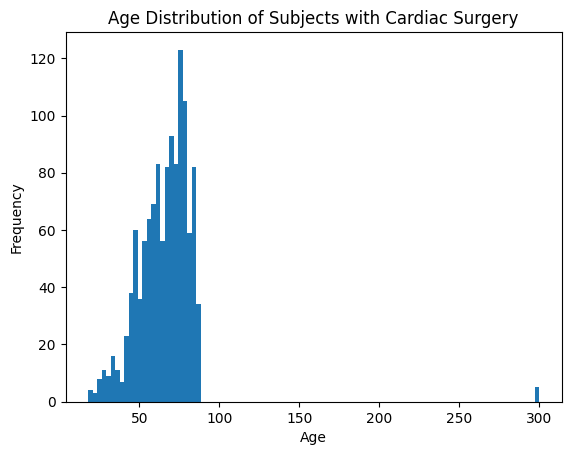

In [65]:
# display histogram via matplotlib
import matplotlib.pyplot as plt
plt.hist(demographics_df['age_years'], bins=100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Subjects with Cardiac Surgery')
plt.show()

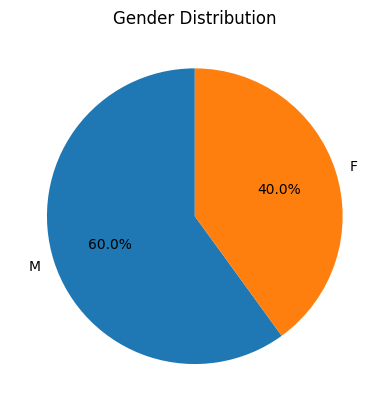

gender
M    732
F    488
Name: count, dtype: int64


In [66]:
demographics_df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

print(demographics_df['gender'].value_counts())

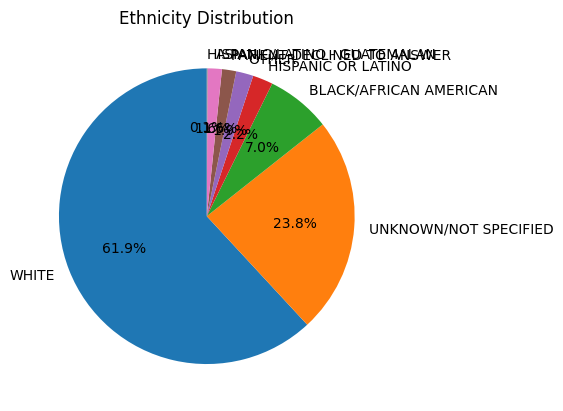

ethnicity
WHITE                           755
UNKNOWN/NOT SPECIFIED           290
BLACK/AFRICAN AMERICAN           86
HISPANIC OR LATINO               27
OTHER                            23
PATIENT DECLINED TO ANSWER       19
ASIAN                            19
HISPANIC/LATINO - GUATEMALAN      1
Name: count, dtype: int64


In [67]:
demographics_df['ethnicity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Ethnicity Distribution')
plt.show()

print(demographics_df['ethnicity'].value_counts())

In [68]:
# get number of unique diagnoses for all entries in demographics_df
unique_diagnoses = set()
for diagnoses in demographics_df['diagnoses']:
    for diagnosis in diagnoses:
        unique_diagnoses.add(diagnosis)

print(f"Total number of unique diagnoses: {len(unique_diagnoses)}")

Total number of unique diagnoses: 903


In [69]:
# get number of unique procedures for all entries in demographics_df
unique_procedures = set()
for procedures in demographics_df['procedures']:
    for procedure in procedures:
        unique_procedures.add(procedure)
print(f"Total number of unique procedures: {len(unique_procedures)}")

Total number of unique procedures: 411


# Create Source and Target dataset 
For now:
- Source: male - recording during stay with cardiothorathic surgery
- Target: female - recording during stay with cardiothorathic surgery

In [70]:

male_records = demographics_df[demographics_df['gender'] == 'M']['record_id'].tolist()
female_records = demographics_df[demographics_df['gender'] == 'F']['record_id'].tolist()

# print to txt file one record_id per line
with open('data/hinrichs_dataset/male_records_hinrichs_base_model.txt', 'w') as f:
    for record_id in male_records:
        f.write(f"{record_id}\n")

with open('data/hinrichs_dataset/female_records_hinrichs_base_model.txt', 'w') as f:
    for record_id in female_records:
        f.write(f"{record_id}\n")

# Check how many patients are on vasopressors during stay

In [16]:
conn, cur = mweh.connect_to_local_mimic_iii()

In [17]:
# load valid records from file
with open('data/hinrichs_dataset/valid_records_hinrichs_base_model.json', 'r') as f:
    valid_records = json.load(f)

subjects = [s['subject'] for s in valid_records]
subjects = list(set(subjects))

In [18]:
# for all subjects and records get the unique item_ids from inputevents_mv and inputevents_cv
item_ids = set()
for record in valid_records:
    record_id = record['record_id']
    subject_id = int(record_id.split('-')[0].replace('p', ''))
    hadm_id = mweh.get_hadm_id_from_record(record_id, cur)

    cur.execute("SELECT itemid FROM mimiciii.inputevents_cv WHERE subject_id=%s AND hadm_id=%s", (subject_id,hadm_id,))
    item_ids_cv = cur.fetchall()
    if item_ids_cv:
        item_ids.update([item_id[0] for item_id in item_ids_cv])

    cur.execute("SELECT itemid FROM mimiciii.inputevents_mv WHERE subject_id=%s AND hadm_id=%s", (subject_id,hadm_id,))
    item_ids_mv = cur.fetchall()
    if item_ids_mv:
        item_ids.update([item_id[0] for item_id in item_ids_cv])

print(len(item_ids))

        


306


In [19]:
for item in item_ids:
    cur.execute("SELECT label FROM mimiciii.d_items WHERE itemid=%s", (item,))
    label = cur.fetchone()
    if label:
        print(f"{item},{label[0]}")
    else:
        print(f"Item ID: {item} not found in d_items table.")

44033,adjustment
40450,EBL
44038,d5w&25meqk+acetate
40402,protonics
44041,D5W 50 meq Ca Acetat
40976,FLOLAN
44050,2/3 str impact/fiber
41491,fluid bolus
41490,NS bolus
41492,plueral fluid
41322,rl bolus
42849,hemovac
43047,BUMEX 12mg/500ml
41001,Angio intake
43050,ca glu 40gm/1L
41518,bumex
41427,1/2 nsfluidbolus
42031,angio u/o
42044,aprotinin cc/hr
42045,nimbex mcg/kg/min
43070,Ca++ Gluconate
42855,ETOH GTT
41532,Pamidronate        l
43073,NaPO4
42565,TROMETHAMINE CC/HR
42925,L CT SITE
42568,R Groin Site
43083,g-t residual
42061,CBI-NS
42590,nimbex
43108,contrast via ng
40549,protonix
40550,PANTOPRAZOLE
41575,ENEMA
43113,SOIDUM PHOSPHATE
42090,Promote with fiber
41579,golytely
41580,free h2o bolus
41068,Liperudin
41582,free h20 bolus
42099,urinary irrigant
42866,cell saver in OR
42927,AMPHO B
42614,Leg bag/serous drg
42915,D5W/10GM CAGLUC
30085,Isocal HN
42621,L GROIN HEMOVAC
42630,Antithymocyte globu
42631,100mgm ATG/250N/S
41381,PLASMAPHERESIS
41101,Protonix
43990,SOD PHOSPHATE
426

#### list of vasopressors
https://flexikon.doccheck.com/de/Vasopressor

- Adrenalin
- Noradrenalin
- Phenylephrin
- Dobutamin - 30042,Dobutamine
- Dopamin - 30043,Dopamine
- Ephedrin - 30044,Epinephrine ?? (is adrenaline, not a vasopressor)
- Dopexamin
- Midodrin
- Ameziniummetilsulfat
- Metaraminol
- Vasopressin - 30051,Vasopressin

https://drugslib.com/classes/vasopressors-206/de#gsc.tab=0

- angiotensin ii - 41001,Angio intake - 42031,angio u/o - 41677,Angio IVF - 42913,angio
- corphedra
- biophen
- droxidopa
- giapreza
- northera
- rezipres
- vazculep


ChatGPT:

✅ Identified Vasopressors in the List:
Dobutamine (30042) - ok 

Dopamine (30043) - ok

Epinephrine (30044) - no - https://www.drugs.com/compare/ephedrine-vs-epinephrine 

Levophed (norepinephrine) (30047) - ok - https://www.picmonic.com/pathways/nursing/courses/standard/critical-care-nursing-1659/critical-care-drugs-4664/norepinephrine-levophed_2234

Vasopressin (30051) - ok 

Neosynephrine (phenylephrine) (30127) - ok - https://www.ncbi.nlm.nih.gov/books/NBK534801/

Neosynephrine-k (30128) - ok 

Epinephrine-k (30119) - no

Levophed-k (30120) - ok


#### Final list of vasopressors:

30042,Dobutamine
30043,Dopamine
30051,Vasopressin
41001,Angio intake
42031,angio u/o
41677,Angio IVF
42913,angio
30047,Levophed
30127,Neosynephrine
30128,Neosynephrine-k
30120,Levophed-k

30042,30043,30051,41001,42031,41677,42913,30047,30127,30128,30120

In [20]:
records_on_vasopressors = mweh.get_records_on_medication_during_stay(
    medication_item_ids=[30042,30043,30051,41001,42031,41677,42913,30047,30127,30128,30120],
    records=valid_records,
    cur=cur
)

print(len(records_on_vasopressors))

1047


In [21]:
mweh.print_statistics_of_waveform_records(records_on_vasopressors, cur)

Number of unique subjects: 649
Number of unique records: 1047
Number of unique stays: 660
Total duration of records: 290029859.99887234 seconds or 4833830.999981206 minutes or 80563.84999968676 hours or 3356.827083320282 days


In [22]:
# write records with vasopressors to file
with open('data/hinrichs_dataset/records_with_vasopressors_surgery_during_stay.txt', 'w') as f:
    for record in records_on_vasopressors:
        f.write(f"{record['record_id']}\n")

In [2]:
# read records with vasopressors from file
with open('data/hinrichs_dataset/records_with_vasopressors_surgery_during_stay.txt', 'r') as f:
    valid_records_with_vasopressors = [line.strip() for line in f.readlines()]

In [3]:
# valid_records without records_on_vasopressors
valid_records_without_vasopressors = [record for record in valid_records if record not in records_on_vasopressors]
mweh.print_statistics_of_waveform_records(valid_records_without_vasopressors, cur)

NameError: name 'valid_records' is not defined

In [22]:
with open('data/hinrichs_dataset/records_without_vasopressors_surgery_during_stay.txt', 'w') as f:
    for record in valid_records_without_vasopressors:
        f.write(f"{record["record_id"]}\n")

### Further exploration on duration of Vasopressor-administration


In [1]:
import mimic_waveform_explore_helper as mweh
import json

In [2]:
# read records without vasopressors from file
with open('data/hinrichs_dataset/records_without_vasopressors_surgery_during_stay.txt', 'r') as f:
    valid_records_without_vasopressors = [line.strip() for line in f.readlines()]

# read records with vasopressors from file
with open('data/hinrichs_dataset/records_with_vasopressors_surgery_during_stay.txt', 'r') as f:
    valid_records_with_vasopressors = [line.strip() for line in f.readlines()]

In [3]:
conn, cur = mweh.connect_to_local_mimic_iii()

In [4]:
medication_item_ids=[30042,30043,30051,41001,42031,41677,42913,30047,30127,30128,30120]

In [22]:
import pandas as pd
def get_medication_administration_durations(records, medication_codes):
    durations_mv = []
    durations_cv = []
    for record in records:
        subject_id = int(record.split('-')[0].replace('p', ''))
        hadm_id = mweh.get_hadm_id_from_record(record, cur)

        cur.execute("SELECT itemid, starttime, endtime FROM mimiciii.inputevents_mv WHERE subject_id=%s AND hadm_id=%s", (subject_id, hadm_id,))
        mv_durations = cur.fetchall()
        for item_id, starttime, endtime in mv_durations:
            if item_id in medication_codes:
                durations_mv.append((subject_id, record, item_id, starttime, endtime))

        cur.execute("SELECT itemid, charttime, amount, amountuom, rate, rateuom, stopped, newbottle, originalrate, originalamount FROM mimiciii.inputevents_cv WHERE subject_id=%s AND hadm_id=%s", (subject_id, hadm_id,))
        cv_durations = cur.fetchall()
        for item_id, charttime, amount, amountuom, rate, rateuom, stopped, new_bottle, original_rate, original_amount in cv_durations:
            if item_id in medication_codes:
                durations_cv.append((subject_id, record, item_id, charttime, amount, amountuom, rate, rateuom, stopped, new_bottle, original_rate, original_amount))

    df_durations_mv = pd.DataFrame(durations_mv, columns=['subject_id', 'record_id', 'item_id', 'starttime', 'endtime'])
    df_durations_cv = pd.DataFrame(durations_cv, columns=['subject_id', 'record_id', 'item_id', 'charttime', 'amount', 'amountuom', 'rate', 'rateuom', 'stopped', 'new_bottle', 'original_rate', 'original_amount'])
    return df_durations_mv, df_durations_cv

In [23]:
df_durations_mv, df_durations_cv = get_medication_administration_durations(valid_records_with_vasopressors, medication_item_ids)

In [24]:
df_durations_mv.head()

,subject_id,record_id,item_id,starttime,endtime


In [26]:
df_durations_cv.head(20)

,subject_id,record_id,item_id,charttime,amount,amountuom,rate,rateuom,stopped,new_bottle,original_rate,original_amount
0,20,p000020-2183-04-28-17-47n,30128,2183-04-29 01:00:00,0.0000,mg,NaN,None,None,NaN,NaN,60.0
1,20,p000020-2183-04-28-17-47n,30128,2183-04-29 02:00:00,0.0000,mg,NaN,None,None,NaN,NaN,60.0
2,20,p000020-2183-04-28-17-47n,30128,2183-04-29 00:00:00,0.0000,mg,NaN,None,None,NaN,NaN,60.0
3,20,p000020-2183-04-28-17-47n,30128,2183-04-28 22:00:00,0.0000,mg,NaN,None,None,NaN,NaN,60.0
4,20,p000020-2183-04-28-17-47n,30128,2183-04-28 21:00:00,1.9593,mg,NaN,None,None,NaN,NaN,60.0
5,20,p000020-2183-04-28-17-47n,30128,2183-04-28 23:00:00,0.0000,mg,NaN,None,None,NaN,NaN,60.0
6,20,p000020-2183-04-28-17-47n,30128,2183-04-28 19:00:00,0.2799,mg,NaN,None,None,NaN,NaN,60.0
7,20,p000020-2183-04-28-17-47n,30128,2183-04-28 18:00:00,0.0000,mg,NaN,None,None,NaN,NaN,60.0
8,20,p000020-2183-04-28-17-47n,30128,2183-04-29 03:00:00,0.0000,mg,NaN,None,None,NaN,NaN,60.0
9,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:15:00,NaN,None,0.5,mcgkgmin,Stopped,NaN,NaN,NaN


In [ ]:
# show all rows with "Stopped" in stopped column
df_durations_cv[df_durations_cv['stopped'] == "Stopped"].head()

,subject_id,record_id,item_id,charttime,amount,amountuom,rate,rateuom,stopped,new_bottle,original_rate,original_amount
9,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:15:00,NaN,None,0.5,mcgkgmin,Stopped,NaN,NaN,NaN
20,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:45:00,NaN,None,0.2,mcgkgmin,Stopped,NaN,NaN,NaN
41,214,p000214-2188-10-24-16-23n,30128,2188-10-25 20:00:00,0.61125,mg,NaN,None,Stopped,NaN,NaN,60.0
107,214,p000214-2188-10-24-16-23n,30128,2188-10-25 04:00:00,NaN,None,NaN,mcgkgmin,Stopped,NaN,NaN,NaN
128,214,p000214-2188-10-24-16-23n,30128,2188-10-25 19:00:00,NaN,None,0.5,mcgkgmin,Stopped,NaN,NaN,NaN


In [29]:
# does each unique record_id have at least one row where "Stopped" is "Stopped"
df_durations_cv[df_durations_cv['stopped'] == "Stopped"].groupby('record_id').size().reset_index(name='counts')['counts'].value_counts()

counts
1     220
2     161
3      98
4      94
5      43
6      35
9      17
7      15
8      12
14      8
21      6
12      6
10      5
27      5
11      5
15      5
17      4
13      3
19      3
45      2
16      2
20      1
Name: count, dtype: int64

each record has at least one entry with "Stopped"

In [9]:
print("Total registered medication administrations: ", len(df_durations_cv))
# count NaN values in df_durations_cv column amount
print("Number of NaN for amount: ", df_durations_cv['amount'].isna().sum(), df_durations_cv['amount'].isna().sum() / len(df_durations_cv) * 100, "%")
# count values where amount == 0.0000
print("Number of 0.0000 for amount: ", (df_durations_cv['amount'] == 0.0000).sum(), (df_durations_cv['amount'] == 0.0000).sum() / len(df_durations_cv) * 100, "%")
print("Number of NaN for rate: ", df_durations_cv['rate'].isna().sum(), df_durations_cv['rate'].isna().sum() / len(df_durations_cv) * 100, "%")
print("Number of 0.0000 for rate: ", (df_durations_cv['rate'] == 0.0000).sum(), (df_durations_cv['rate'] == 0.0000).sum() / len(df_durations_cv) * 100, "%")

# count columns for which amount and rate are both NaN
print("Number of rows with NaN for both amount and rate: ", df_durations_cv[df_durations_cv['amount'].isna() & df_durations_cv['rate'].isna()].shape[0], df_durations_cv[df_durations_cv['amount'].isna() & df_durations_cv['rate'].isna()].shape[0] / len(df_durations_cv) * 100, "%")


Total registered medication administrations:  300623
Number of NaN for amount:  187068 62.226775729069296 %
Number of 0.0000 for amount:  10835 3.6041819820838725 %
Number of NaN for rate:  115801 38.520339428453575 %
Number of 0.0000 for rate:  15339 5.10240400767739 %
Number of rows with NaN for both amount and rate:  2246 0.7471151575228775 %


In [20]:
df_durations_cv['new_bottle'].value_counts()

new_bottle
1.0    1681
Name: count, dtype: int64

In [21]:
df_durations_cv['stopped'].value_counts()

stopped
Stopped     2922
D/C'd       1906
Restart      225
NotStopd      37
Name: count, dtype: int64

In [31]:
# get #usable medication administrations

# get df that only contains rows from df_durations_cv where amount is not NaN and rate is NaN
df_usable_amount_medications = df_durations_cv[(df_durations_cv['amount'].notna() & df_durations_cv['rate'].isna() & (df_durations_cv['amount'] != 0.0000)) | (df_durations_cv['stopped'] == "Stopped")]
print("#Usable medication administrations with amount not NaN and rate NaN: ", df_usable_amount_medications.shape[0], df_usable_amount_medications.shape[0] / len(df_durations_cv) * 100, "%")


df_usable_rate_medications = df_durations_cv[(df_durations_cv['rate'].notna() & df_durations_cv['amount'].isna() & (df_durations_cv['rate'] != 0.0000)) | (df_durations_cv['stopped'] == "Stopped")]
print("#Usable medication administrations with rate not NaN and amount NaN: ", df_usable_rate_medications.shape[0], df_usable_rate_medications.shape[0] / len(df_durations_cv) * 100, "%")

#Usable medication administrations with amount not NaN and rate NaN:  105144 34.97536781949485 %
#Usable medication administrations with rate not NaN and amount NaN:  171632 57.09210539446416 %


###### CHARTTIME 
represents the time at which the measurement was charted - that is - recorded on the clinical information system at the bedside. For amounts received (usually volumes), the CHARTTIME represents the time at which that volume was received. That is, it can be considered an “end time”, i.e. X millilitres of solution was administered to the patient by this CHARTTIME. For rates, the CHARTTIME represents the time at which that rate was set. That is, it can be considered a “start time”, i.e. the patient is now receiving X mcg/kg/min of a drug at this CHARTTIME.

###### AMOUNT, AMOUNTUOM
AMOUNT and AMOUNTUOM list the amount of a drug or substance administered to the patient either between the STARTTIME and ENDTIME (if both are available) or at the ENDTIME (when the exact start time is unknown, but usually up to an hour before).
=> 1 hour before until charttime

###### RATE, RATEUOM
RATE and RATEUOM list the rate at which the drug or substance was administered to the patient either between the STARTTIME and ENDTIME (if both are available), or it lists the rate at which the drug is currently administered at the ENDTIME
=> charttime = starttime

In [33]:
# let's investigate the rates a bit closer
df_usable_rate_medications = df_usable_rate_medications.sort_values(by=['record_id', 'charttime'])
df_usable_rate_medications.head(50)


,subject_id,record_id,item_id,charttime,amount,amountuom,rate,rateuom,stopped,new_bottle,original_rate,original_amount
12,20,p000020-2183-04-28-17-47n,30128,2183-04-28 18:00:00,NaN,None,0.10,mcgkgmin,None,NaN,NaN,NaN
17,20,p000020-2183-04-28-17-47n,30128,2183-04-28 18:15:00,NaN,None,0.10,mcgkgmin,None,NaN,NaN,NaN
19,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:00:00,NaN,None,0.50,mcgkgmin,None,NaN,NaN,NaN
9,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:15:00,NaN,None,0.50,mcgkgmin,Stopped,NaN,NaN,NaN
10,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:30:00,NaN,None,0.20,mcgkgmin,None,NaN,NaN,NaN
20,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:45:00,NaN,None,0.20,mcgkgmin,Stopped,NaN,NaN,NaN
30,138,p000138-2131-10-31-13-39n,30128,2131-11-01 00:00:00,NaN,None,0.50,mcgkgmin,None,NaN,NaN,NaN
133,214,p000214-2188-10-24-16-23n,30128,2188-10-24 19:15:00,NaN,None,0.50,mcgkgmin,None,NaN,NaN,NaN
134,214,p000214-2188-10-24-16-23n,30128,2188-10-24 19:30:00,NaN,None,0.75,mcgkgmin,None,NaN,NaN,NaN
130,214,p000214-2188-10-24-16-23n,30128,2188-10-24 20:00:00,NaN,None,0.50,mcgkgmin,None,NaN,NaN,NaN


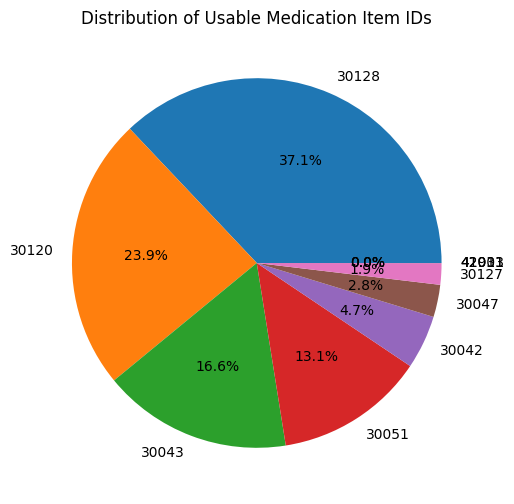

In [36]:
# visualize the different item_ids as pie chart
import matplotlib.pyplot as plt

item_counts = df_usable_amount_medications['item_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(item_counts, labels=item_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Usable Medication Item IDs')
plt.show()

In [37]:
# how many record_ids have different item_ids
unique_record_ids = df_usable_rate_medications['record_id'].nunique()
print("Number of unique record_ids with different item_ids: ", unique_record_ids, unique_record_ids / df_usable_rate_medications.shape[0] * 100, "%")


Number of unique record_ids with different item_ids:  1021 0.5948774121375967 %


In [38]:
# let's investigate the amounts a bit closer
df_usable_amount_medications = df_usable_amount_medications.sort_values(by=['record_id', 'charttime'])
df_usable_amount_medications.head(20)

,subject_id,record_id,item_id,charttime,amount,amountuom,rate,rateuom,stopped,new_bottle,original_rate,original_amount
6,20,p000020-2183-04-28-17-47n,30128,2183-04-28 19:00:00,0.2799,mg,NaN,None,None,NaN,NaN,60.0
9,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:15:00,NaN,None,0.5,mcgkgmin,Stopped,NaN,NaN,NaN
20,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:45:00,NaN,None,0.2,mcgkgmin,Stopped,NaN,NaN,NaN
4,20,p000020-2183-04-28-17-47n,30128,2183-04-28 21:00:00,1.9593,mg,NaN,None,None,NaN,NaN,60.0
22,138,p000138-2131-10-31-13-39n,30128,2131-11-01 00:00:00,4.9500,mg,NaN,None,None,NaN,NaN,60.0
80,214,p000214-2188-10-24-16-23n,30128,2188-10-24 20:00:00,2.4450,mg,NaN,None,None,NaN,NaN,60.0
66,214,p000214-2188-10-24-16-23n,30128,2188-10-24 21:00:00,1.9560,mg,NaN,None,None,NaN,NaN,60.0
105,214,p000214-2188-10-24-16-23n,30128,2188-10-24 22:00:00,0.9780,mg,NaN,None,None,NaN,NaN,60.0
70,214,p000214-2188-10-24-16-23n,30128,2188-10-24 23:00:00,0.9780,mg,NaN,None,None,NaN,NaN,60.0
95,214,p000214-2188-10-24-16-23n,30128,2188-10-25 00:00:00,1.4670,mg,NaN,None,None,NaN,NaN,60.0


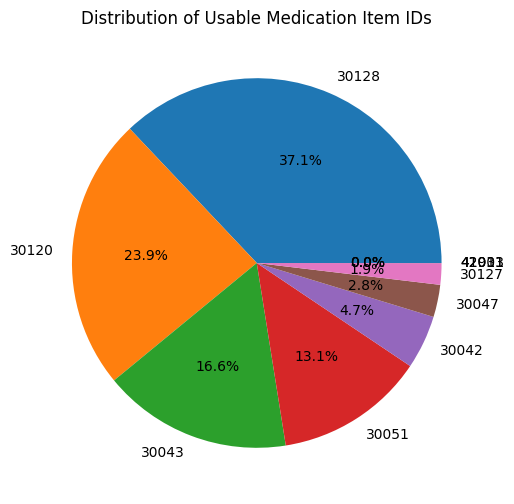

In [39]:
# visualize the different item_ids as pie chart
import matplotlib.pyplot as plt

item_counts = df_usable_amount_medications['item_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(item_counts, labels=item_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Usable Medication Item IDs')
plt.show()

In [40]:
# how many record_ids have different item_ids
unique_record_ids = df_usable_amount_medications['record_id'].nunique()
print("Number of unique record_ids with different item_ids: ", unique_record_ids, unique_record_ids / df_usable_amount_medications.shape[0] * 100, "%")


Number of unique record_ids with different item_ids:  995 0.946321235638743 %


#### Calculate start and endtime of medication administration for rate-administration

In [44]:
# df ['subject_id', 'record_id', 'item_id', 'charttime', 'rate', 'stopped']
def calculate_start_end_time_medication_administrations(df):
    # subject_id, record_id, medication_admin_idx, item_id, starttime, endtime
    record_start_endtimes = []

    # sort df
    df = df.sort_values(by=['subject_id', 'record_id', 'item_id', 'charttime'])


    subject_id = ""
    record_id = ""
    item_id = ""
    medication_admin_idx = 0
    need_to_initialize = True
    
    for idx, row in df.iterrows():

        if subject_id != row['subject_id'] or record_id != row['record_id'] or item_id != row['item_id']:
            # if we are not in the same subject, record, and item, we need to initialize
            need_to_initialize = True

        # initialize variables for new medication administration
        if need_to_initialize:
            subject_id = row['subject_id']
            record_id = row['record_id']
            medication_admin_idx += 1
            item_id = row['item_id']
            starttime = row['charttime']
            need_to_initialize = False

        if row['stopped'] == "Stopped":
            endtime = row['charttime']
            if endtime != starttime:
                record_start_endtimes.append((subject_id, record_id, item_id, starttime, endtime))
            need_to_initialize = True

    return pd.DataFrame(record_start_endtimes, columns=['subject_id', 'record_id', 'item_id', 'starttime', 'endtime'])

In [45]:
medication_start_end_df = calculate_start_end_time_medication_administrations(df_usable_rate_medications)

medication_start_end_df.head(50)

,subject_id,record_id,item_id,starttime,endtime
0,20,p000020-2183-04-28-17-47n,30128,2183-04-28 18:00:00,2183-04-28 20:15:00
1,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:30:00,2183-04-28 20:45:00
2,214,p000214-2188-10-24-16-23n,30128,2188-10-24 19:15:00,2188-10-25 04:00:00
3,214,p000214-2188-10-24-16-23n,30128,2188-10-25 07:00:00,2188-10-25 19:00:00
4,279,p000279-2164-06-14-21-22n,30120,2164-06-15 01:00:00,2164-06-16 13:00:00
5,318,p000318-2129-06-07-07-15n,30128,2129-06-09 12:30:00,2129-06-11 11:00:00
6,369,p000369-2142-10-09-13-03n,30128,2142-10-10 00:00:00,2142-10-10 01:00:00
7,369,p000369-2142-10-09-13-03n,30128,2142-10-10 01:45:00,2142-10-10 05:00:00
8,408,p000408-2188-10-27-22-27n,30051,2188-12-07 22:00:00,2188-12-12 12:00:00
9,408,p000408-2188-10-27-22-27n,30120,2188-12-07 10:00:00,2188-12-10 05:00:00


In [48]:
print(len(medication_start_end_df))

# count unique entries for record_id
print("Number of unqiue records: ", medication_start_end_df['record_id'].nunique())
print("Number of unique subjects: ", medication_start_end_df['subject_id'].nunique())

2214
Number of unqiue records:  747
Number of unique subjects:  453


In [49]:
# save as csv
medication_start_end_df.to_csv('data/hinrichs_dataset/rate_medication_start_end_times_hinrichs_base_model.csv', index=False)

In [ ]:
# load 
df = pd.read_csv('data/hinrichs_dataset/rate_medication_start_end_times_hinrichs_base_model.csv')
df.head()

# TODO add start and endtime of the records

,subject_id,record_id,item_id,starttime,endtime
0,20,p000020-2183-04-28-17-47n,30128,2183-04-28 18:00:00,2183-04-28 20:15:00
1,20,p000020-2183-04-28-17-47n,30128,2183-04-28 20:30:00,2183-04-28 20:45:00
2,214,p000214-2188-10-24-16-23n,30128,2188-10-24 19:15:00,2188-10-25 04:00:00
3,214,p000214-2188-10-24-16-23n,30128,2188-10-25 07:00:00,2188-10-25 19:00:00
4,279,p000279-2164-06-14-21-22n,30120,2164-06-15 01:00:00,2164-06-16 13:00:00


In [ ]:
# transform to start_end
def transform_csv_to_csv_with_start_and_end(input_csv_path, output_csv_path):
    """
    Transforms a CSV file with records into a new CSV file with start and end times.
    :param input_csv_path: Path to the input CSV file.
    :param output_csv_path: Path to the output CSV file.
    """
    df = pd.read_csv(input_csv_path)

    # drop all rows where chartdate_start == chartdate_end
    df = df[df["chartdate_start"] != df["chartdate_end"]]

    df["offset_start_seconds"] = (
        pd.to_datetime(df["chartdate_start"], format='%Y-%m-%d %H:%M:%S') 
        - pd.to_datetime(df["record_start_time"], format='%Y-%m-%d %H:%M:%S')
        ).dt.total_seconds().clip(lower=0)

    # Calculate the element-wise maximum between chartdate_start and record_start_time
    start_max = pd.concat([
        pd.to_datetime(df["chartdate_start"], format='%Y-%m-%d %H:%M:%S'),
        pd.to_datetime(df["record_start_time"], format='%Y-%m-%d %H:%M:%S')
    ], axis=1).max(axis=1)

    df["offset_end_seconds"] = (
        pd.to_datetime(df["chartdate_end"], format='%Y-%m-%d %H:%M:%S') 
        - start_max
    ).dt.total_seconds().clip(upper=(
        pd.to_datetime(df["record_end_time"], format='%Y-%m-%d %H:%M:%S') 
        - pd.to_datetime(df["record_start_time"], format='%Y-%m-%d %H:%M:%S')
    ).dt.total_seconds())

    df = df.drop(columns=["chartdate_start", "chartdate_end", "record_start_time", "record_end_time", "subject_id", "hadm_id"])

    df.to_csv(output_csv_path, index=False)


## Record with Mechanical Ventilation during stay

In [63]:
# cptevent??? procedureevents_mv

cpt_codes = set()
item_ids = set()
for record in valid_records:
    record_id = record['record_id']
    subject_id = int(record_id.split('-')[0].replace('p', ''))
    hadm_id = mweh.get_hadm_id_from_record(record_id, cur)

    cur.execute("SELECT cpt_cd, description FROM mimiciii.cptevents WHERE subject_id=%s AND hadm_id=%s", (subject_id,hadm_id,))
    item_ids_mv = cur.fetchall()
    if item_ids_mv:
        cpt_codes.update([item_id for item_id in item_ids_mv])

    cur.execute("SELECT itemid FROM mimiciii.procedureevents_mv WHERE subject_id = %s AND hadm_id = %s", (subject_id, hadm_id,))
    item_ids_mv = cur.fetchall()
    if item_ids_mv:
        item_ids.update([item_id[0] for item_id in item_ids_mv])


In [64]:
print(len(item_ids))

for item in item_ids:
    print(f"{item[0]},{item[1]}")

# sort cpt_codes by first element
cpt_codes = sorted(cpt_codes, key=lambda x: x[0])
print(len(cpt_codes))
for item in cpt_codes:
    print(f"{item[0]},{item[1]}")

0
89
20605,None
20610,None
31500,None
31502,None
31600,None
31615,None
31622,None
31623,None
31624,None
31625,None
31629,None
31631,None
31635,None
31640,None
31641,None
31645,None
31646,None
32000,None
32002,None
32005,None
32020,None
33210,None
33967,None
33968,None
36489,None
36556,None
36620,None
36800,None
38221,None
43235,None
43244,None
43246,None
43255,None
45378,None
49080,None
49081,None
62270,None
76604,None
76937,None
76942,None
90801,None
90925,None
90935,None
90937,None
90945,None
90947,None
92950,None
92960,None
93010,None
93503,None
93724,None
93731,None
93732,None
93734,None
93744,None
94002,VENT MGMT, 1ST DAY (INVASIVE)
94003,VENT MGMT;SUBSQ DAYS(INVASIVE)
94656,None
99141,None
99217,None
99218,None
99220,None
99221,None
99222,None
99223,None
99231,None
99232,None
99233,None
99234,None
99235,None
99236,None
99238,None
99239,None
99251,None
99252,None
99253,None
99254,None
99255,None
99261,None
99262,None
99263,None
99271,None
99272,None
99273,None
99274,None
99291,Non

current procedural terminology (CPT) codes

10004 - 69990 - Surgery
70010 - 79999 - Radiology Procedures
90281 - 99607 - Medicine Services and Procedures
90785 - 90899 - Psychiatry Services and Procedures
90935 - 90999 - Dialysis Services and Procedures
92920 - 93799 - Cardiovascular Procedures (# 92950,None # 93744,None)
94002 - 94799 - Pulmonary Procedures(#94002,VENT MGMT, 1ST DAY (INVASIVE), #94656,None)

94002,VENT MGMT, 1ST DAY (INVASIVE) - Under Ventilator Management - Use this code for the initial setting of ventilator parameters for a patient who cannot breathe on his own. The service is performed for a hospital inpatient or observation patient, first day of treatment.
94003,VENT MGMT;SUBSQ DAYS(INVASIVE) - Under Ventilator Management - Use this code for each subsequent day managing ventilator settings for a patient who cannot breathe on his own.
94656,None - Deleted code, effective Jan. 1, 2007



In [114]:
def get_records_with_procedure_during_stay(records, cpt_codes, cur):
    """
    Get records that have mechanical ventilation during stay.
    :param records: List of records to check.
    :param cur: Database cursor.
    :return: List of records with mechanical ventilation during stay.
    """
    records_with_procedure = []
    for record in records:
        record_id = record['record_id']
        subject_id = int(record_id.split('-')[0].replace('p', ''))
        hadm_id = mweh.get_hadm_id_from_record(record_id, cur)

        for cpt_code in cpt_codes:
            cur.execute("SELECT cpt_cd, description FROM mimiciii.cptevents WHERE subject_id=%s AND hadm_id=%s AND cpt_cd=%s", (subject_id, hadm_id, cpt_code,))
            item_ids_mv = cur.fetchall()
            if item_ids_mv:
                records_with_procedure.append(record)
                break

    return records_with_procedure

In [115]:
records_with_procedure_stay = get_records_with_procedure_during_stay(
    records=valid_records,
    cpt_codes=["94002", "94003"],
    cur=cur
)

In [116]:
mweh.print_statistics_of_waveform_records(records_with_procedure_stay, cur)

Number of unique subjects: 556
Number of unique records: 921
Number of unique stays: 563
Total duration of records: 245967599.9988901 seconds or 4099459.9999815016 minutes or 68324.33333302503 hours or 2846.847222209376 days


In [117]:
with open('data/hinrichs_dataset/records_with_mechanical_ventilation_during_stay.txt', 'w') as f:
    for record in records_with_procedure_stay:
        f.write(f"{record["record_id"]}\n")

In [118]:
# valid_records without records_with_procedure_stay
valid_records_without_ventilation = [record for record in valid_records if record not in records_with_procedure_stay]
mweh.print_statistics_of_waveform_records(valid_records_without_ventilation, cur)

Number of unique subjects: 373
Number of unique records: 565
Number of unique stays: 329
Total duration of records: 127055099.99960937 seconds or 2117584.9999934896 minutes or 35293.08333322482 hours or 1470.5451388843676 days


In [119]:
with open('data/hinrichs_dataset/records_without_mechanical_ventilation_during_stay.txt', 'w') as f:
    for record in valid_records_without_ventilation:
        f.write(f"{record["record_id"]}\n")

### Ok how do we reduce to the times in which the patients were ventilated?

- procedureevents_mv contains 0 data
- how about in the general input_events - there changes to the ventialtor settings should be kept 
    - we can filter by the chartdate of the cptevent (only look starting from there)

- let's go with item_ids of chartevents

In [188]:
import mimic_waveform_explore_helper as mweh
import json

In [189]:
con, cur = mweh.connect_to_local_mimic_iii()

In [190]:
# read data/'data/hinrichs_dataset/records_with_mechanical_ventilation_during_stay.txt'
with open('data/hinrichs_dataset/records_with_mechanical_ventilation_during_stay.txt', 'r') as f:
    records_with_mechanical_ventilation = [line.strip() for line in f.readlines()]

In [191]:
len(records_with_mechanical_ventilation)

921

In [192]:
## filter for stays that were encoded as subsequent days!!!
data = []

def get_start_of_subsequent_ventilation_days(records):
    for cpt_code in ['94003']:
        for record in records:
            subject_id = int(record.split('-')[0].replace('p', ''))
            hadm_id = mweh.get_hadm_id_from_record(record, cur)

            cur.execute("SELECT chartdate, cpt_cd FROM mimiciii.cptevents WHERE subject_id=%s AND hadm_id=%s AND cpt_cd=%s", (subject_id, hadm_id, cpt_code,))
            cpt_events = cur.fetchall()
            for chartdate, cpt_cd in cpt_events:
                data.append((subject_id, hadm_id, record, cpt_cd, chartdate))

    return pd.DataFrame(data, columns=['subject_id', 'hadm_id', 'record', 'cpt_cd', 'chartdate'])

In [215]:
ventilation_df = get_start_of_subsequent_ventilation_days(records_with_mechanical_ventilation)

In [216]:
ventilation_df.head(20)

,subject_id,hadm_id,record,cpt_cd,chartdate
0,328,146586,p000328-2149-10-31-14-50n,94003,2149-11-03
1,328,146586,p000328-2149-10-31-14-50n,94003,2149-11-04
2,328,146586,p000328-2149-10-31-14-50n,94003,2149-11-02
3,328,146586,p000328-2149-10-31-14-50n,94003,2149-11-01
4,369,145787,p000369-2142-10-09-13-03n,94003,2142-10-10
5,408,173910,p000408-2188-10-27-22-27n,94003,2188-12-16
6,408,173910,p000408-2188-10-27-22-27n,94003,2188-12-17
7,408,173910,p000408-2188-10-27-22-27n,94003,2188-12-18
8,408,173910,p000408-2188-10-27-22-27n,94003,2188-12-19
9,408,173910,p000408-2188-10-27-22-27n,94003,2188-12-21


In [217]:
# sort by subject_id, record_id and chartdate
ventilation_df = ventilation_df.sort_values(by=['subject_id', 'record', 'chartdate'])
# remove duplicate entries for record_id
ventilation_df_start = ventilation_df[~ventilation_df.duplicated(subset=['record'], keep='first')]
ventilation_df_end = ventilation_df[~ventilation_df.duplicated(subset=['record'], keep='last')]
ventilation_df_start.head(10)

,subject_id,hadm_id,record,cpt_cd,chartdate
3,328,146586,p000328-2149-10-31-14-50n,94003,2149-11-01
4,369,145787,p000369-2142-10-09-13-03n,94003,2142-10-10
30,408,173910,p000408-2188-10-27-22-27n,94003,2188-12-06
65,408,173910,p000408-2188-10-28-18-23n,94003,2188-12-06
100,408,173910,p000408-2188-10-29-19-10n,94003,2188-12-06
129,507,136251,p000507-2148-09-20-17-06n,94003,2148-09-18
144,515,184373,p000515-2162-06-16-11-35n,94003,2162-06-26
146,608,171266,p000608-2167-03-09-11-54n,94003,2167-03-10
159,608,171266,p000608-2167-03-23-08-12n,94003,2167-03-10
172,625,145523,p000625-2178-04-25-03-12n,94003,2178-04-27


In [218]:
ventilation_df_end.head(10)

,subject_id,hadm_id,record,cpt_cd,chartdate
9828,328,146586,p000328-2149-10-31-14-50n,94003,2149-11-04
9831,369,145787,p000369-2142-10-09-13-03n,94003,2142-10-10
9856,408,173910,p000408-2188-10-27-22-27n,94003,2189-01-11
9891,408,173910,p000408-2188-10-28-18-23n,94003,2189-01-11
9926,408,173910,p000408-2188-10-29-19-10n,94003,2189-01-11
9955,507,136251,p000507-2148-09-20-17-06n,94003,2148-10-22
9972,515,184373,p000515-2162-06-16-11-35n,94003,2162-06-27
9985,608,171266,p000608-2167-03-09-11-54n,94003,2167-03-24
9998,608,171266,p000608-2167-03-23-08-12n,94003,2167-03-24
10002,625,145523,p000625-2178-04-25-03-12n,94003,2178-04-30


In [219]:
# merge the start and end dataframes
ventilation_df = pd.merge(ventilation_df_start, ventilation_df_end, on=['subject_id', 'hadm_id', 'record'], suffixes=('_start', '_end'))
# drop specific columns
ventilation_df = ventilation_df.drop(columns=['cpt_cd_start', 'cpt_cd_end'])


In [220]:
ventilation_df.head(10)

,subject_id,hadm_id,record,chartdate_start,chartdate_end
0,328,146586,p000328-2149-10-31-14-50n,2149-11-01,2149-11-04
1,369,145787,p000369-2142-10-09-13-03n,2142-10-10,2142-10-10
2,408,173910,p000408-2188-10-27-22-27n,2188-12-06,2189-01-11
3,408,173910,p000408-2188-10-28-18-23n,2188-12-06,2189-01-11
4,408,173910,p000408-2188-10-29-19-10n,2188-12-06,2189-01-11
5,507,136251,p000507-2148-09-20-17-06n,2148-09-18,2148-10-22
6,515,184373,p000515-2162-06-16-11-35n,2162-06-26,2162-06-27
7,608,171266,p000608-2167-03-09-11-54n,2167-03-10,2167-03-24
8,608,171266,p000608-2167-03-23-08-12n,2167-03-10,2167-03-24
9,625,145523,p000625-2178-04-25-03-12n,2178-04-27,2178-04-30


In [221]:
# read durations of recordings
path_to_numerics_signal_duration = 'data\mimic3wdb-matched_numerics_signals_duration.csv'
numerics_signal_duration = pd.read_csv(path_to_numerics_signal_duration)

# filter out all columns where record_id is not in ventilation_df
numerics_signal_duration = numerics_signal_duration[numerics_signal_duration['record_id'].isin(ventilation_df['record'])]
# keep only the first entry for duplicated record_id
numerics_signal_duration = numerics_signal_duration.drop_duplicates(subset=['record_id'], keep='first')
# drop unnecessary columns
numerics_signal_duration = numerics_signal_duration.drop(columns=['signal', 'sampling_frequency', 'subject'])
numerics_signal_duration.head(10)

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Mayra Elwes\AppData\Local\Temp\ipykernel_1180\2738434836.py:2: SyntaxWarning: invalid escape sequence '\m'
  path_to_numerics_signal_duration = 'data\mimic3wdb-matched_numerics_signals_duration.csv'


,record_id,duration_seconds
1290,p000328-2149-10-31-14-50n,430739.999999
1429,p000369-2142-10-09-13-03n,80519.999998
1561,p000408-2188-10-27-22-27n,67500.000000
1573,p000408-2188-10-28-18-23n,78720.000000
1585,p000408-2188-10-29-19-10n,9120.000000
1795,p000507-2148-09-20-17-06n,615119.999988
1809,p000515-2162-06-16-11-35n,389459.999999
2042,p000608-2167-03-09-11-54n,859079.999998
2053,p000608-2167-03-23-08-12n,112080.000000
2102,p000625-2178-04-25-03-12n,152520.000000


In [222]:
import datetime
numerics_signal_duration['record_start_time'] = (numerics_signal_duration['record_id'].str.replace('n', '', regex=False).str[8:])
numerics_signal_duration['record_end_time'] = (
    pd.to_datetime(numerics_signal_duration['record_start_time'], format='%Y-%m-%d-%H-%M')
    + pd.to_timedelta(numerics_signal_duration['duration_seconds'], unit='s')
).dt.strftime('%Y-%m-%d-%H-%M-%S')

numerics_signal_duration.head(10)

,record_id,duration_seconds,record_start_time,record_end_time
1290,p000328-2149-10-31-14-50n,430739.999999,2149-10-31-14-50,2149-11-05-14-28-59
1429,p000369-2142-10-09-13-03n,80519.999998,2142-10-09-13-03,2142-10-10-11-24-59
1561,p000408-2188-10-27-22-27n,67500.000000,2188-10-27-22-27,2188-10-28-17-11-59
1573,p000408-2188-10-28-18-23n,78720.000000,2188-10-28-18-23,2188-10-29-16-14-59
1585,p000408-2188-10-29-19-10n,9120.000000,2188-10-29-19-10,2188-10-29-21-41-59
1795,p000507-2148-09-20-17-06n,615119.999988,2148-09-20-17-06,2148-09-27-19-57-59
1809,p000515-2162-06-16-11-35n,389459.999999,2162-06-16-11-35,2162-06-20-23-45-59
2042,p000608-2167-03-09-11-54n,859079.999998,2167-03-09-11-54,2167-03-19-10-31-59
2053,p000608-2167-03-23-08-12n,112080.000000,2167-03-23-08-12,2167-03-24-15-19-59
2102,p000625-2178-04-25-03-12n,152520.000000,2178-04-25-03-12,2178-04-26-21-33-59


In [223]:
# merge numerics_signal_duration and ventilation_df on record_id
merged_df = pd.merge(ventilation_df, numerics_signal_duration, left_on='record', right_on='record_id', how='inner')
# drop columns
merged_df = merged_df.drop(columns=['record_id', 'duration_seconds'])
# add "-00-00-00" to chartdate_start and chartdate_end
merged_df['chartdate_start'] = merged_df['chartdate_start'].astype(str) + '-00-00-00'
merged_df['chartdate_end'] = merged_df['chartdate_end'].astype(str) + '-00-00-00'
merged_df['record_start_time'] = merged_df['record_start_time'].astype(str) + '-00'

merged_df.head(10)

,subject_id,hadm_id,record,chartdate_start,chartdate_end,record_start_time,record_end_time
0,328,146586,p000328-2149-10-31-14-50n,2149-11-01-00-00-00,2149-11-04-00-00-00,2149-10-31-14-50-00,2149-11-05-14-28-59
1,369,145787,p000369-2142-10-09-13-03n,2142-10-10-00-00-00,2142-10-10-00-00-00,2142-10-09-13-03-00,2142-10-10-11-24-59
2,408,173910,p000408-2188-10-27-22-27n,2188-12-06-00-00-00,2189-01-11-00-00-00,2188-10-27-22-27-00,2188-10-28-17-11-59
3,408,173910,p000408-2188-10-28-18-23n,2188-12-06-00-00-00,2189-01-11-00-00-00,2188-10-28-18-23-00,2188-10-29-16-14-59
4,408,173910,p000408-2188-10-29-19-10n,2188-12-06-00-00-00,2189-01-11-00-00-00,2188-10-29-19-10-00,2188-10-29-21-41-59
5,507,136251,p000507-2148-09-20-17-06n,2148-09-18-00-00-00,2148-10-22-00-00-00,2148-09-20-17-06-00,2148-09-27-19-57-59
6,515,184373,p000515-2162-06-16-11-35n,2162-06-26-00-00-00,2162-06-27-00-00-00,2162-06-16-11-35-00,2162-06-20-23-45-59
7,608,171266,p000608-2167-03-09-11-54n,2167-03-10-00-00-00,2167-03-24-00-00-00,2167-03-09-11-54-00,2167-03-19-10-31-59
8,608,171266,p000608-2167-03-23-08-12n,2167-03-10-00-00-00,2167-03-24-00-00-00,2167-03-23-08-12-00,2167-03-24-15-19-59
9,625,145523,p000625-2178-04-25-03-12n,2178-04-27-00-00-00,2178-04-30-00-00-00,2178-04-25-03-12-00,2178-04-26-21-33-59


In [224]:
# ventilation starts during recording
merged_df['record_contains_ventilation'] = (merged_df['chartdate_start'] >= merged_df['record_start_time']) & (merged_df['chartdate_start'] <= merged_df['record_end_time'])
# ventilation stops during recording
merged_df['record_contains_ventilation'] = merged_df['record_contains_ventilation'] | (merged_df['chartdate_end'] >= merged_df['record_start_time']) & (merged_df['chartdate_end'] <= merged_df['record_end_time'])
# recording completely contained in ventilation
merged_df['record_contains_ventilation'] = merged_df['record_contains_ventilation'] | (merged_df['record_start_time'] >= merged_df['chartdate_start']) & (merged_df['record_end_time'] <= merged_df['chartdate_end'])
merged_df.head(20)

,subject_id,hadm_id,record,chartdate_start,chartdate_end,record_start_time,record_end_time,record_contains_ventilation
0,328,146586,p000328-2149-10-31-14-50n,2149-11-01-00-00-00,2149-11-04-00-00-00,2149-10-31-14-50-00,2149-11-05-14-28-59,True
1,369,145787,p000369-2142-10-09-13-03n,2142-10-10-00-00-00,2142-10-10-00-00-00,2142-10-09-13-03-00,2142-10-10-11-24-59,True
2,408,173910,p000408-2188-10-27-22-27n,2188-12-06-00-00-00,2189-01-11-00-00-00,2188-10-27-22-27-00,2188-10-28-17-11-59,False
3,408,173910,p000408-2188-10-28-18-23n,2188-12-06-00-00-00,2189-01-11-00-00-00,2188-10-28-18-23-00,2188-10-29-16-14-59,False
4,408,173910,p000408-2188-10-29-19-10n,2188-12-06-00-00-00,2189-01-11-00-00-00,2188-10-29-19-10-00,2188-10-29-21-41-59,False
5,507,136251,p000507-2148-09-20-17-06n,2148-09-18-00-00-00,2148-10-22-00-00-00,2148-09-20-17-06-00,2148-09-27-19-57-59,True
6,515,184373,p000515-2162-06-16-11-35n,2162-06-26-00-00-00,2162-06-27-00-00-00,2162-06-16-11-35-00,2162-06-20-23-45-59,False
7,608,171266,p000608-2167-03-09-11-54n,2167-03-10-00-00-00,2167-03-24-00-00-00,2167-03-09-11-54-00,2167-03-19-10-31-59,True
8,608,171266,p000608-2167-03-23-08-12n,2167-03-10-00-00-00,2167-03-24-00-00-00,2167-03-23-08-12-00,2167-03-24-15-19-59,True
9,625,145523,p000625-2178-04-25-03-12n,2178-04-27-00-00-00,2178-04-30-00-00-00,2178-04-25-03-12-00,2178-04-26-21-33-59,False


In [225]:
# drop all rows where record_contains_ventilation is False
merged_df = merged_df[merged_df['record_contains_ventilation']]
# drop unnecessary columns record_contains_ventilation
merged_df = merged_df.drop(columns=['record_contains_ventilation'])
print(len(merged_df))
print("unique patients:", merged_df['subject_id'].nunique())
print("unique records:", merged_df['record'].nunique())
print("unique hadm_ids:", merged_df['hadm_id'].nunique())

622
unique patients: 396
unique records: 622
unique hadm_ids: 402


In [ ]:
# merged_df['ventilation_duration_seconds'] = (min(merged_df['chartdate_end'], merged_df['record_end_time']) - max(merged_df['chartdate_start'], merged_df['record_start_time'])).dt.total_seconds()
for col in ['chartdate_start', 'record_start_time', 'chartdate_end', 'record_end_time']:
    merged_df[col] = pd.to_datetime(merged_df[col], format='%Y-%m-%d-%H-%M-%S')

# Calculate duration in seconds
merged_df['ventilation_duration_seconds'] = (
    (pd.concat([merged_df['chartdate_end'], merged_df['record_end_time']], axis=1).min(axis=1) -
     pd.concat([merged_df['chartdate_start'], merged_df['record_start_time']], axis=1).max(axis=1))
    .dt.total_seconds()
)


In [228]:
# drop columns where ventilation_duration_seconds == 0
merged_df = merged_df[merged_df['ventilation_duration_seconds'] > 0]
merged_df.head(20)

,subject_id,hadm_id,record,chartdate_start,chartdate_end,record_start_time,record_end_time,ventilation_duration_seconds
0,328,146586,p000328-2149-10-31-14-50n,2149-11-01,2149-11-04,2149-10-31 14:50:00,2149-11-05 14:28:59,259200.0
5,507,136251,p000507-2148-09-20-17-06n,2148-09-18,2148-10-22,2148-09-20 17:06:00,2148-09-27 19:57:59,615119.0
7,608,171266,p000608-2167-03-09-11-54n,2167-03-10,2167-03-24,2167-03-09 11:54:00,2167-03-19 10:31:59,815519.0
8,608,171266,p000608-2167-03-23-08-12n,2167-03-10,2167-03-24,2167-03-23 08:12:00,2167-03-24 15:19:59,56880.0
10,625,145523,p000625-2178-04-27-00-49n,2178-04-27,2178-04-30,2178-04-27 00:49:00,2178-04-27 09:28:59,31199.0
11,625,145523,p000625-2178-04-27-10-42n,2178-04-27,2178-04-30,2178-04-27 10:42:00,2178-05-03 18:19:59,220680.0
12,710,114242,p000710-2182-02-18-17-20n,2182-02-19,2182-02-28,2182-02-18 17:20:00,2182-02-21 10:30:59,210659.0
13,710,114242,p000710-2182-02-25-15-47n,2182-02-19,2182-02-28,2182-02-25 15:47:00,2182-02-28 15:21:59,202380.0
16,787,179228,p000787-2142-06-24-13-20n,2142-06-26,2142-06-27,2142-06-24 13:20:00,2142-06-28 14:59:59,86400.0
18,865,147052,p000865-2199-05-23-11-36n,2199-05-24,2199-05-29,2199-05-23 11:36:00,2199-05-24 15:30:59,55859.0


In [229]:
print("unique patients:", merged_df['subject_id'].nunique())
print("unique records:", merged_df['record'].nunique())
print("unique hadm_ids:", merged_df['hadm_id'].nunique())

unique patients: 291
unique records: 513
unique hadm_ids: 294


In [230]:
# sum up duration
total_duration = merged_df['ventilation_duration_seconds'].sum()
print("Total ventilation duration (seconds):", total_duration)
# in days
print("Total ventilation duration (days):", total_duration / (60 * 60 * 24))

Total ventilation duration (seconds): 137191024.0
Total ventilation duration (days): 1587.859074074074


In [206]:
# save to csv
merged_df.to_csv('data/hinrichs_dataset/records_with_start_endtime/ventilation_94003_records.csv', index=False)


In [1]:
import pandas as pd
import json
import mimic_waveform_explore_helper as mweh

In [30]:
df = pd.read_csv('data/hinrichs_dataset/records_with_start_endtime/ventilation_94003_records.csv')
df.head()

,subject_id,hadm_id,record,chartdate_start,chartdate_end,record_start_time,record_end_time
0,328,146586,p000328-2149-10-31-14-50n,2149-11-01-00-00-00,2149-11-04-00-00-00,2149-10-31-14-50-00,2149-11-05-14-28-59
1,369,145787,p000369-2142-10-09-13-03n,2142-10-10-00-00-00,2142-10-10-00-00-00,2142-10-09-13-03-00,2142-10-10-11-24-59
2,507,136251,p000507-2148-09-20-17-06n,2148-09-18-00-00-00,2148-10-22-00-00-00,2148-09-20-17-06-00,2148-09-27-19-57-59
3,608,171266,p000608-2167-03-09-11-54n,2167-03-10-00-00-00,2167-03-24-00-00-00,2167-03-09-11-54-00,2167-03-19-10-31-59
4,608,171266,p000608-2167-03-23-08-12n,2167-03-10-00-00-00,2167-03-24-00-00-00,2167-03-23-08-12-00,2167-03-24-15-19-59


In [31]:
# drop all rows where chartdate_start == chartdate_end
df = df[df["chartdate_start"] != df["chartdate_end"]]

In [32]:
df["offset_start_seconds"] = (
    pd.to_datetime(df["chartdate_start"], format='%Y-%m-%d-%H-%M-%S') 
    - pd.to_datetime(df["record_start_time"], format='%Y-%m-%d-%H-%M-%S')
).dt.total_seconds().clip(lower=0)

# Calculate the element-wise maximum between chartdate_start and record_start_time
start_max = pd.concat([
    pd.to_datetime(df["chartdate_start"], format='%Y-%m-%d-%H-%M-%S'),
    pd.to_datetime(df["record_start_time"], format='%Y-%m-%d-%H-%M-%S')
], axis=1).max(axis=1)

df["offset_end_seconds"] = (
    pd.to_datetime(df["chartdate_end"], format='%Y-%m-%d-%H-%M-%S') 
    - start_max
).dt.total_seconds().clip(upper=(
    pd.to_datetime(df["record_end_time"], format='%Y-%m-%d-%H-%M-%S') 
    - pd.to_datetime(df["record_start_time"], format='%Y-%m-%d-%H-%M-%S')
).dt.total_seconds())

df.head()

,subject_id,hadm_id,record,chartdate_start,chartdate_end,record_start_time,record_end_time,offset_start_seconds,offset_end_seconds
0,328,146586,p000328-2149-10-31-14-50n,2149-11-01-00-00-00,2149-11-04-00-00-00,2149-10-31-14-50-00,2149-11-05-14-28-59,33000.0,259200.0
2,507,136251,p000507-2148-09-20-17-06n,2148-09-18-00-00-00,2148-10-22-00-00-00,2148-09-20-17-06-00,2148-09-27-19-57-59,0.0,615119.0
3,608,171266,p000608-2167-03-09-11-54n,2167-03-10-00-00-00,2167-03-24-00-00-00,2167-03-09-11-54-00,2167-03-19-10-31-59,43560.0,859079.0
4,608,171266,p000608-2167-03-23-08-12n,2167-03-10-00-00-00,2167-03-24-00-00-00,2167-03-23-08-12-00,2167-03-24-15-19-59,0.0,56880.0
5,625,145523,p000625-2178-04-27-00-49n,2178-04-27-00-00-00,2178-04-30-00-00-00,2178-04-27-00-49-00,2178-04-27-09-28-59,0.0,31199.0


In [33]:

df = df.drop(columns=["chartdate_start", "chartdate_end", "record_start_time", "record_end_time", "subject_id", "hadm_id"])

df.head()

,record,offset_start_seconds,offset_end_seconds
0,p000328-2149-10-31-14-50n,33000.0,259200.0
2,p000507-2148-09-20-17-06n,0.0,615119.0
3,p000608-2167-03-09-11-54n,43560.0,859079.0
4,p000608-2167-03-23-08-12n,0.0,56880.0
5,p000625-2178-04-27-00-49n,0.0,31199.0


In [34]:
df.to_csv('data/hinrichs_dataset/records_with_start_endtime/ventilation_94003_records.csv', index=False)

In [37]:
df["duration_seconds"] = df["offset_end_seconds"] - df["offset_start_seconds"]
total_duration = df["duration_seconds"].sum()
print(total_duration)
print("total duration in days:", total_duration / (60 * 60 * 24))

133077491.0
total duration in days: 1540.248738425926


### Create CSV for not-time-restricted records - patients without mechanical ventilation

In [1]:
# load necessary libararies
import pandas as pd
import json
import mimic_waveform_explore_helper as mweh

C:\Users\Mayra Elwes\Documents\MyWork\PhD\mayra_phd\notebooks\cohort_creation\mimic_waveform_explore_helper.py:460: SyntaxWarning: invalid escape sequence '\m'
  path_to_numrics_signal_duration = 'data\mimic3wdb-matched_numerics_signals_duration.csv'
C:\Users\Mayra Elwes\Documents\MyWork\PhD\mayra_phd\notebooks\cohort_creation\mimic_waveform_explore_helper.py:900: SyntaxWarning: invalid escape sequence '\m'
  path_to_numrics_signal_duration = 'data\mimic3wdb-matched_numerics_signals_duration.csv'


In [3]:
mweh.transtlate_txt_to_csv_with_start_and_end('./data/hinrichs_dataset/records_without_mechanical_ventilation_during_stay.txt', 
                                             './data/hinrichs_dataset/records_with_start_endtime/no_ventilation_records.csv')